# Logistic Map

In [1]:
from pylab import *

The logistic map is given as: 

$$x_{n+1}=f(x_n)=r\cdot x_n\cdot \left(1-x_n\right)$$
with $r>0$

We first define this function:

In [2]:
def getNext(x, r):
    return r*x*(1-x)

## Critical Points
Let us first check, where our critical points are. Remember, we are using discrete maps, so a critical point can be found at: $x_{n+1}=x_n=x^*$ (nothing changes)

$$x^*=r\cdot x^*\cdot (1-x^*)$$

$$x^*_1=0 $$ $$\vee$$ $$ 1=r\cdot(1-x^*_2) \Rightarrow x^*_2=1-r^{-1}$$

For the stability analysis we need $f'(x)$:
$$f'(x)=-2rx+r$$
(a critical point $x^*$ is stable, if $|f'(x^*)|<1$

Stability for $x_1^*=0$:
$$f'(x_1^*=0)=r$$
$x_1^*=0$ is therefore stable for $|r|<1$. With $r>0$:
$$0<r<1$$

Stability for $x_2^*=1-r^{-1}$:
$$f'(x^*_2=1-r^{-1})=-2r\cdot(1-r^{-1})+r=-2r+2+r=2-r$$

$x_2^*=1-r^{-1}$ is therefore stable if
$$1<r<3$$

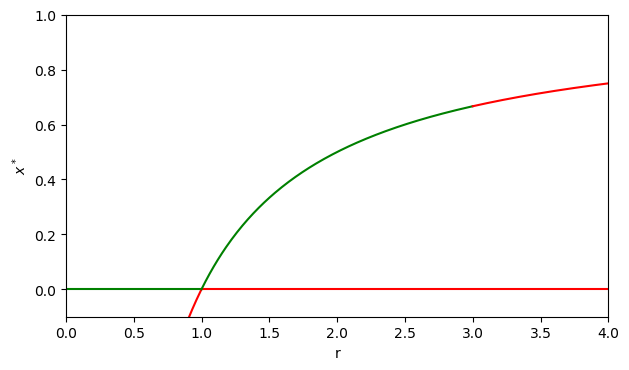

In [3]:
figure(figsize=(7, 4), dpi=100)

#define the limits for the plots:
xlim([0,4])
ylim([-0.1,1])
xlabel('r')
ylabel('$x^*$')

#first x_1:
x = np.linspace(0, 1, 2)  # 2 evenly-spaced values from 0 to 1
y = np.zeros(2)
plot(x,y,'-g') #stable, so green
#still x_1
x = np.linspace(1, 4, 2)  # 2 evenly-spaced values from 1 to 4
y = np.zeros(2)
plot(x,y,'-r') #unstable, so red!

#x_2:
x2_func = lambda r: 1.-1./r
x2_vecfunc = np.vectorize(x2_func)

x = np.linspace(0.1, 1, 200)  # 200 evenly-spaced values from 0.1 to 1
y = x2_vecfunc(x)
plot(x,y,'-r') #unstable, so red
#still x_2
x = np.linspace(1, 3, 200)  # 200 evenly-spaced values from 1 to 3
y = x2_vecfunc(x)
plot(x,y,'-g') #stable, so green!
#still x_2
x = np.linspace(3, 4, 200)  # 200 evenly-spaced values from 3 to 4
y = x2_vecfunc(x)
plot(x,y,'-r') #unstable, so red!

show()

Open question in this interval: what happens for $3<r<4$?
Answer: we sometimes get cycles, i.e. $$x_{n+m}=x_{n}$$
To illustrate this, let us define a function that gives us already converged $x_n$.

In [4]:
def getLastN(x0,r,transient,number):
    x=x0
    for i in range(0,transient):
        x=getNext(x,r)
    #xvec=[xvec=[x]]
    xvec=[x]
    for i in range(0,number):
        x=getNext(x,r)
        xvec.append(x)
    return xvec

x0=0.1
transiente=1000
lastnumber=10
print("r=0: (stable critical point)")
print(getLastN(x0,0.,transiente,lastnumber))
print("r=0.5: (stable critical point)")
print(getLastN(x0,0.5,transiente,lastnumber))
print("r=1: (stable critical point)")
print(getLastN(x0,1.,transiente,lastnumber))
print("r=2: (stable critical point)")
print(getLastN(x0,2,transiente,lastnumber))
print("r=3: (stable critical point)")
print(getLastN(x0,3,transiente,lastnumber))
print("r=3.2: (stable 2-cycle)")
print(getLastN(x0,3.2,transiente,lastnumber))
print("r=3.5: (stable 4-cycle)")
print(getLastN(x0,3.5,transiente,lastnumber))

r=0: (stable critical point)
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
r=0.5: (stable critical point)
[7.686291081808886e-303, 3.843145540904443e-303, 1.9215727704522215e-303, 9.607863852261108e-304, 4.803931926130554e-304, 2.401965963065277e-304, 1.2009829815326384e-304, 6.004914907663192e-305, 3.002457453831596e-305, 1.501228726915798e-305, 7.50614363457899e-306]
r=1: (stable critical point)
[0.0009855391906809531, 0.000984567903184585, 0.0009835985292286037, 0.000982631063161903, 0.0009816654993556125, 0.0009807018322029873, 0.000979740056119301, 0.0009787801655417364, 0.0009778221549292785, 0.000976866018762608, 0.000975911751543995]
r=2: (stable critical point)
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
r=3: (stable critical point)
[0.6591907869838786, 0.6739748800183601, 0.6591982233677915, 0.6739677770296163, 0.6592056376661211, 0.6739606948059713, 0.6592130299878712, 0.6739536332462437, 0.6592204004412939, 0.673946592249942, 0.6592277491338973]
r=3.2:

This is not very nice to look at, so we want to make it nicer!

We want to show all stable nodes and cycles depending on $r$

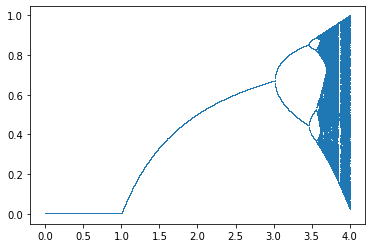

In [5]:
numEndPoints=200
transiente=10000
x = np.linspace(0.0, 4, 3000)
x0 = 0.1

#x2_vecfunc = np.vectorize(getLastN)
y=[]
for r in x:
    y.extend(getLastN(x0,r,transiente,numEndPoints))

xvalues=np.repeat(x, numEndPoints)
# print(len(xvalues))
# print(len(y))
plot(xvalues,y[:len(xvalues)],',')
show()

We see chaotic bahavior starting at around 3.5 and a stable 3-cycle at around 3.83:

In [6]:
print("r = 1+sqrt(8) =",1+sqrt(8),": (stable 3-cycle)")
print(getLastN(x0,1+sqrt(8.),transiente,lastnumber))

r = 1+sqrt(8) = 3.8284271247461903 : (stable 3-cycle)
[0.15992543498148273, 0.5143464668972302, 0.9563188100568624, 0.15992543599932363, 0.5143464695475874, 0.9563188097657238, 0.15992543701655204, 0.5143464721963499, 0.9563188094747603, 0.15992543803316872, 0.5143464748435194]


For values bigger than r=4 divergence occurs:

In [7]:
print("r = 4.1 : (divergence)")
print(getLastN(x0,4.,20,10))

r = 4.1 : (divergence)
[0.8200138733909665, 0.5903644833492417, 0.9673370405960985, 0.1263843619475224, 0.4416454200105602, 0.9863789719770243, 0.05374198247429209, 0.2034151271760999, 0.6481496528481241, 0.9122067214439212, 0.3203424751858141]


For more information and other nice plots:
https://en.wikipedia.org/wiki/Logistic_map